In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

df = pd.read_csv('Salary_dataset.csv')

print(df.to_string())

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

<Axes: ylabel='YearsExperience'>

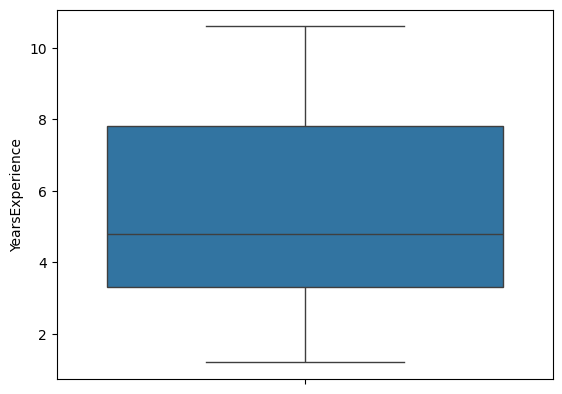

In [144]:
import seaborn as sns

sns.boxplot(df['YearsExperience'])

In [145]:
df.drop('Unnamed: 0', axis=1, inplace=True)

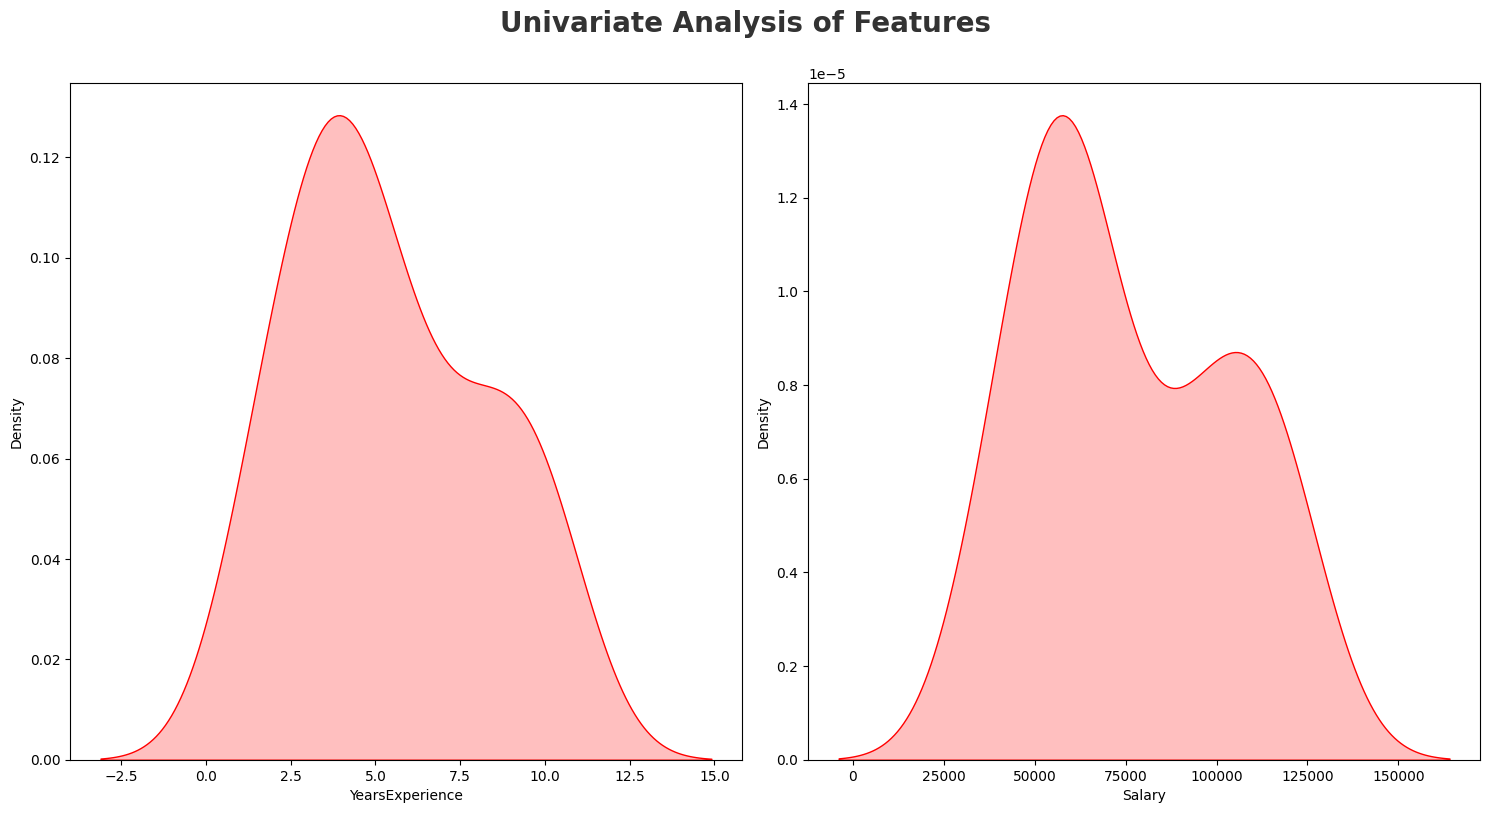

In [146]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
features = ['YearsExperience', 'Salary']
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[features[i]], shade=True, color='r')
    plt.xlabel(features[i])
    plt.tight_layout()

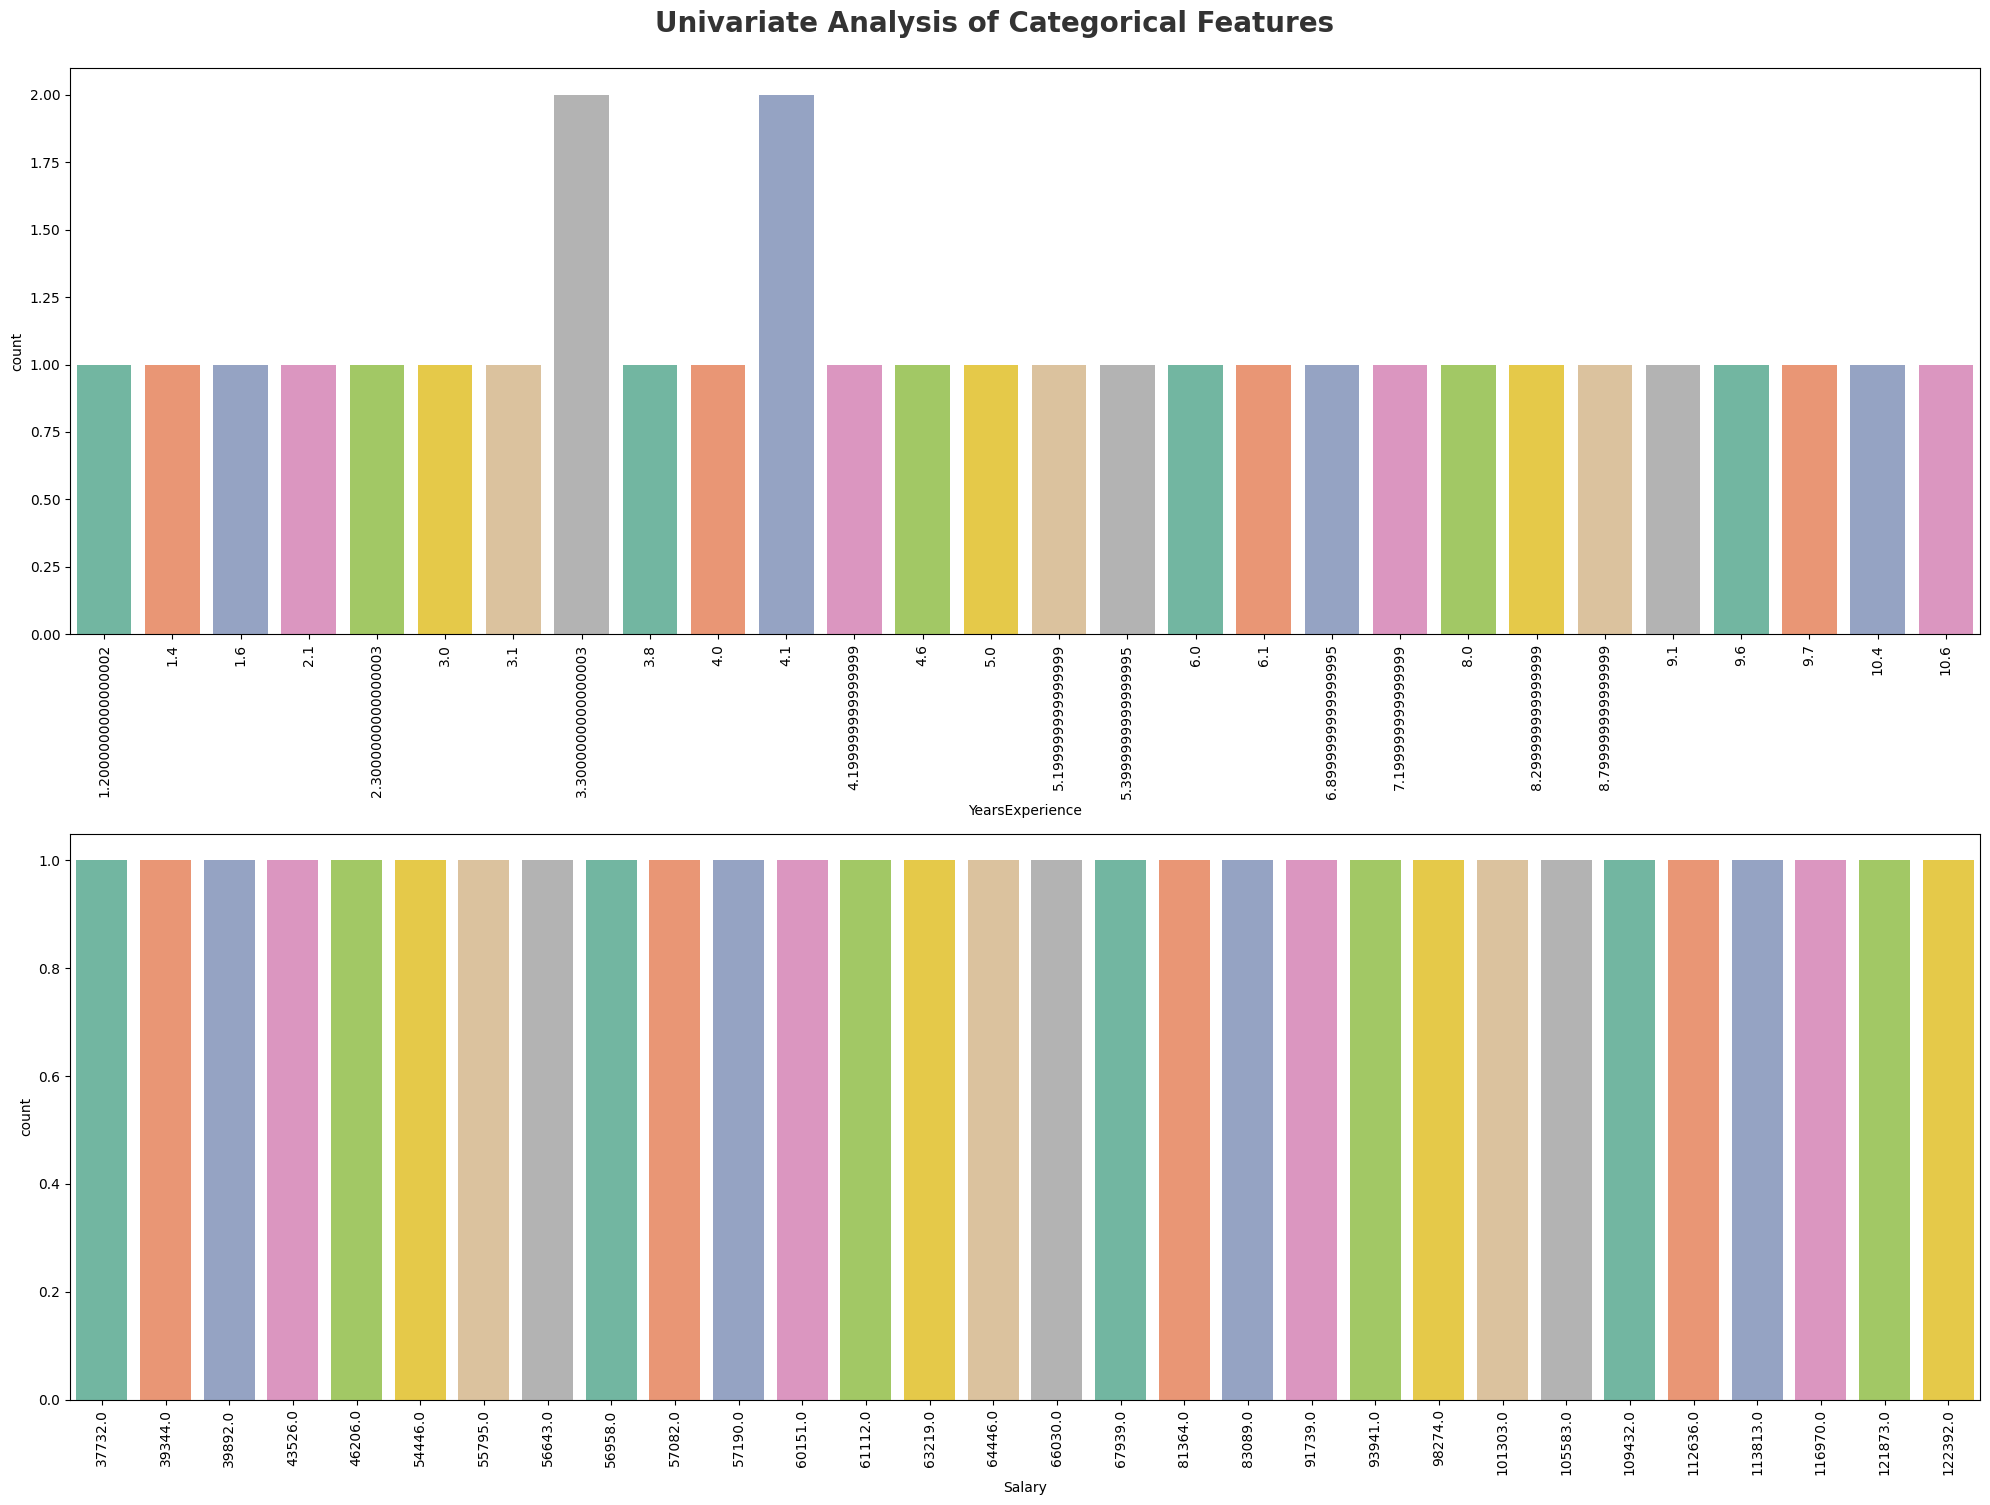

In [147]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(features)):
    plt.subplot(2, 1, i+1)
    sns.countplot(x=df[features[i]],palette="Set2")
    plt.xlabel(features[i])
    plt.xticks(rotation=90)
    plt.tight_layout() 

# ML model begins

Text(0, 0.5, 'Salary')

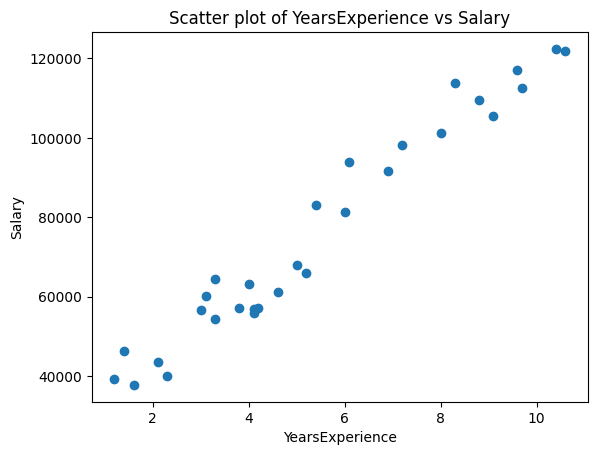

In [148]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.title('Scatter plot of YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [149]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


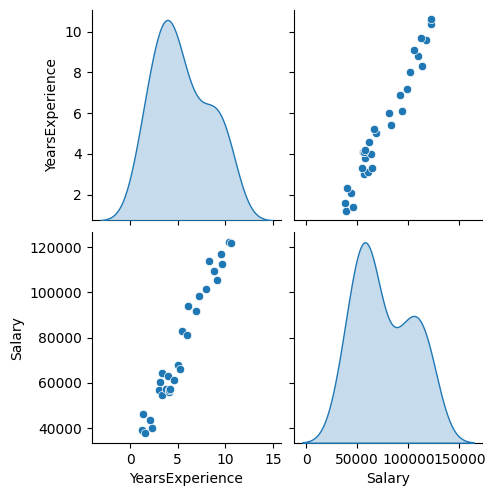

In [150]:
sns.pairplot(df, diag_kind='kde', palette='Set2')

In [151]:
# Ind and dependent features
X=df[['YearsExperience']] # independent features should be in 2D array
y=df['Salary'] # dependent feature can be in 1D array
X.head()
np.array(X).shape

(30, 1)

In [152]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [153]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test


array([[ 1.79640106],
       [ 0.03908914],
       [ 1.27294644],
       [ 0.1886476 ],
       [-0.59653431],
       [-0.40958624],
       [ 2.05812836],
       [ 1.45989452]])

In [154]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [155]:
model.intercept_
model.coef_



array([25063.1519945])

Text(0.5, 1.0, 'Salary vs Experience (Training set)')

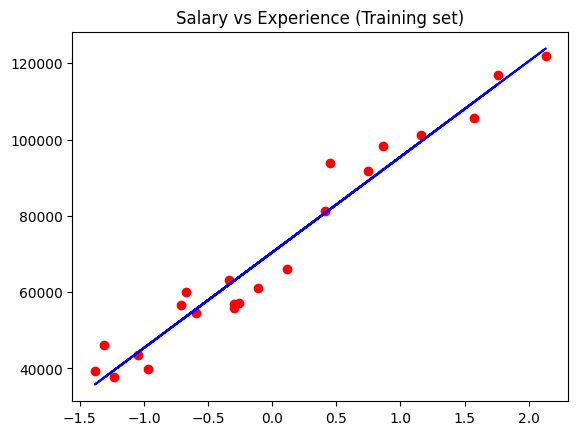

In [156]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')

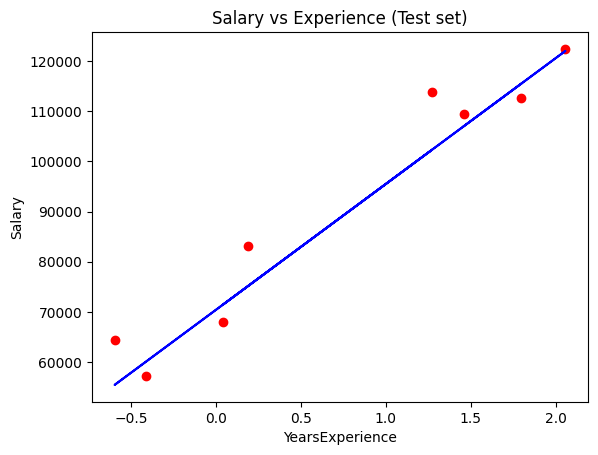

array([115440.88180109,  71397.10622651, 102321.45928951,  75145.51265839,
        55466.37889103,  60151.88693088, 122000.59305688, 107006.96732936])

In [157]:
# Predicting the test set results
# pred = intercept + coef * X_test
# pred = 25792.20019866871 + 9449.96232155 * X_test
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, model.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()
y_pred = model.predict(X_test)
y_pred

In [158]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))
# adjusted r2 score
def adj_r2_score(r2, n, p):
    return 1 - (1-r2) * (n-1)/(n-p-1)
n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)
print('Adjusted R2 Score:', adj_r2_score(r2, n, p))

Mean Absolute Error: 5056.995466663591
Mean Squared Error: 38802588.99247062
Root Mean Squared Error: 6229.172416338355
R2 Score: 0.9347210011126783
Adjusted R2 Score: 0.9238411679647913


In [159]:
# prediction for new data
new_data = [[6]]
new_data = scaler.transform(new_data)
pred = model.predict(new_data)
print('Predicted Salary for 5.5 years of experience:', pred[0])

Predicted Salary for 5.5 years of experience: 80768.12230621034


In [ ]:
# OLS Regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(prediction)
model.summary()